# Práctica 5:

---
### Autores: Grupo 7
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 29 de noviembre de 2018, 18.00h

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
import pandas as pd

## 1. Regresión lineal regularizada

In [2]:
data = loadmat('ex5data1.mat')
# data.keys()
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']

In [3]:
def h(X, theta):
    return X.dot(theta)

def J(theta, X, y, l_rate):
    return ((h(X_, theta) - y.ravel()).dot(h(X_, theta) - y.ravel())/(len(y)*2)
            + l_rate/(2*len(y))*(np.square(theta[1:])).sum())

def gradJ(theta, X, y, l_rate):
    aux = np.hstack(([0],theta[1:]))
    grad = (X.T.dot(h(X, theta) - y.ravel()))/len(y) + l_rate*aux/len(y)
    return grad

In [4]:
l_rate = 1
theta = np.array([1, 1]).ravel()
X_ = np.c_[np.ones((len(X),1)),X]

In [5]:
J(theta, X, y, l_rate)

303.9931922202643

In [6]:
gradJ(theta, X_, y, l_rate) # Error on 2nd comp.?

array([-15.30301567, 598.25074417])

In [7]:
l_rate = 0
fmin = minimize(fun=J, x0=theta, args=(X_, y, l_rate))
# fmin

<IPython.core.display.Javascript object>


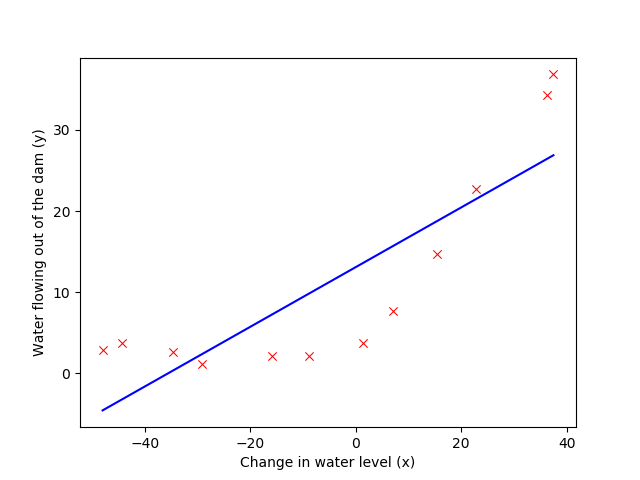

In [9]:
plt.figure()
plt.scatter(X, y, marker = 'x', c = 'r', linewidth = 0.75)
lineX = np.linspace(min(X), max(X), 1000)
lineY = np.c_[np.ones((1000,1)),lineX].dot(fmin.x)
plt.plot(lineX, lineY, '-', c = 'blue')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

## 2. Curvas de aprendizaje